Data preprocessin

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers, models ,regularizers


In [14]:
train_dir = "D:\\prj111\\Alzheimer_s Dataset\\newtrain"
test_dir = "D:\\prj111\\Alzheimer_s Dataset\\newtest"


In [15]:
'''
batch_size = 32
img_size = (176, 206)  # or whatever your original image size is

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,  # 20% of the training data used for validation
    subset="training",
    seed=123,
    label_mode='categorical'
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,  # Same 20% for validation
    subset="validation",
    seed=123,
    label_mode='categorical'
)

# Test dataset remains unchanged
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)
'''
import tensorflow as tf

batch_size = 32
img_size = (176, 206)  # Original image size

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical'
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical'
)

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Function to convert images to grayscale
def to_grayscale(image, label):
    # Convert image to grayscale
    gray_image = tf.image.rgb_to_grayscale(image)
    return gray_image, label

# Apply grayscale conversion to the datasets
train_dataset = train_dataset.map(to_grayscale)
validation_dataset = validation_dataset.map(to_grayscale)
test_dataset = test_dataset.map(to_grayscale)

# Now train_dataset, validation_dataset, and test_dataset contain grayscale images


Found 9600 files belonging to 4 classes.
Using 7680 files for training.
Found 9600 files belonging to 4 classes.
Using 1920 files for validation.
Found 2400 files belonging to 4 classes.


In [4]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 176, 206, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [4]:
for images, labels in test_dataset.take(1):
    print("Shape of labels:", labels.shape)


Shape of labels: (32, 4)


In [17]:
tf.random.set_seed(123)

model_1= models.Sequential([
    layers.Input(shape=(176, 206, 1)),  # Explicitly define input layer
    
    layers.Rescaling(1./255),  # Rescale pixel values
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(512,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3, 3), activation='relu'),
    #layers.Conv2D(512,(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
     
    
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dense(10, activation='relu'),
    #layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [18]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 176, 206, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 174, 204, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 174, 204, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 172, 202, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 86, 101, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 84, 99, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 84, 99, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 82, 97, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 41, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 39, 46, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 39, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 37, 44, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 20, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32256)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,128,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,817,476 (33.64 MB)

 Trainable params: 8,815,556 (33.63 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [19]:
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00070),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [20]:
  # Set the number of epochs

history = model_1.fit(
    train_dataset,  # Training dataset
    validation_data=validation_dataset,  # Validation dataset for validation during training
    epochs=10, # Number of epochs
   # callbacks=[lr_scheduler]

)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1861s 8s/step - accuracy: 0.4113 - loss: 3.7476 - val_accuracy: 0.2427 - val_loss: 2.7705
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1849s 8s/step - accuracy: 0.6719 - loss: 0.8176 - val_accuracy: 0.3224 - val_loss: 2.6398
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1863s 8s/step - accuracy: 0.7513 - loss: 0.6038 - val_accuracy: 0.7099 - val_loss: 0.7238
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1817s 8s/step - accuracy: 0.8169 - loss: 0.4697 - val_accuracy: 0.7109 - val_loss: 0.7137
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1762s 7s/step - accuracy: 0.8549 - loss: 0.3725 - val_accuracy: 0.7786 - val_loss: 0.6067
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1762s 7s/step - accuracy: 0.9029 - loss: 0.2609 - val_accuracy: 0.8401 - val_loss: 0.4303
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1765s 7s/step - accuracy: 0.9231 - loss: 0.2003 - val_accuracy: 0.7917 - val_loss: 0.7686
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1773s 7s/step - accuracy: 0.9368 - loss: 0.1580 - 

<Axes: xlabel='epochs'>

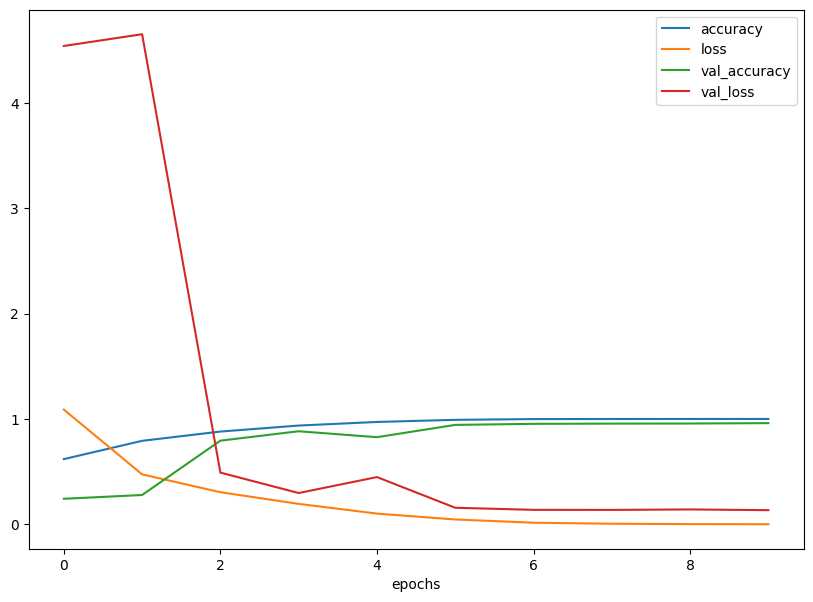

In [8]:
import pandas as pd
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

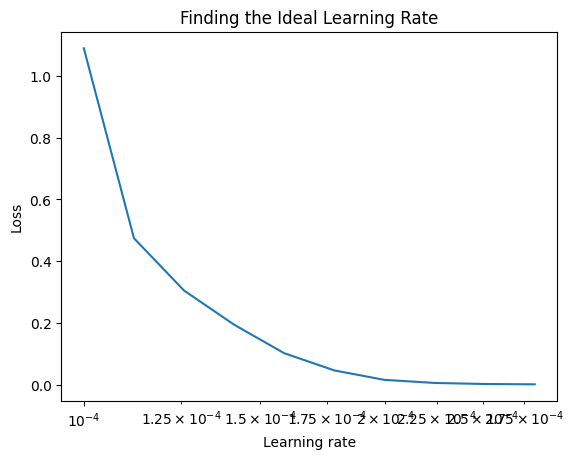

In [9]:
import numpy as np
lrs = 1e-4 * (10**(np.arange(len(history.history["loss"]))/20))

# Plot the learning rate decay curve
plt.semilogx(lrs, history.history["loss"])  # x-axis log scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal Learning Rate")
plt.show()

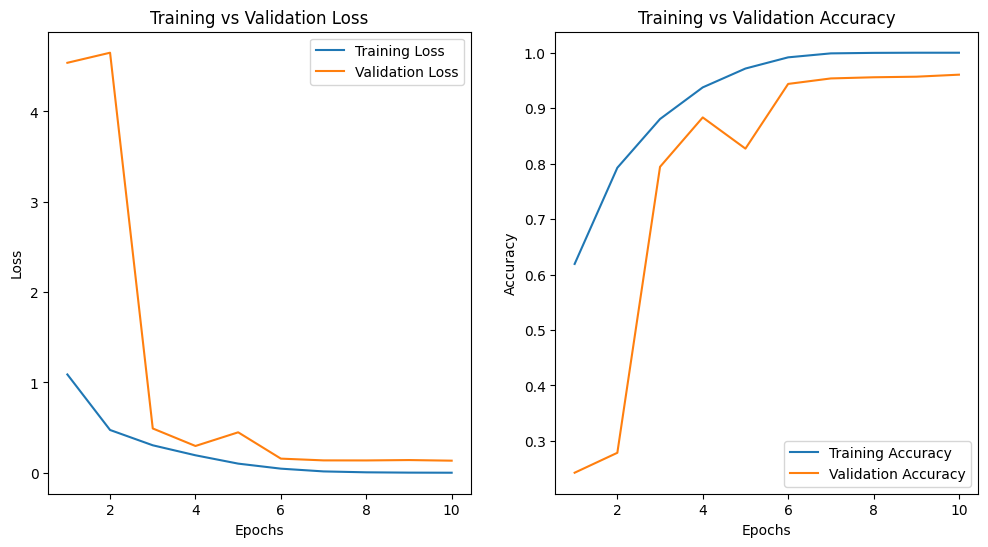

In [10]:
import matplotlib.pyplot as plt

# Retrieve values from history
history_dict = history.history
train_loss = history_dict['loss']  # Training loss
val_loss = history_dict['val_loss']  # Validation loss
train_acc = history_dict['accuracy']  # Training accuracy
val_acc = history_dict['val_accuracy']  # Validation accuracy

# Create epochs range
epochs_range = range(1, len(train_loss) + 1)

# Plot Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Show the plots
plt.show()


In [11]:
# Evaluate the model on the test dataset
test_loss, test_acc = model_1.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9530 - loss: 0.1621
Test Loss: 0.15747329592704773
Test Accuracy: 0.95291668176651


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

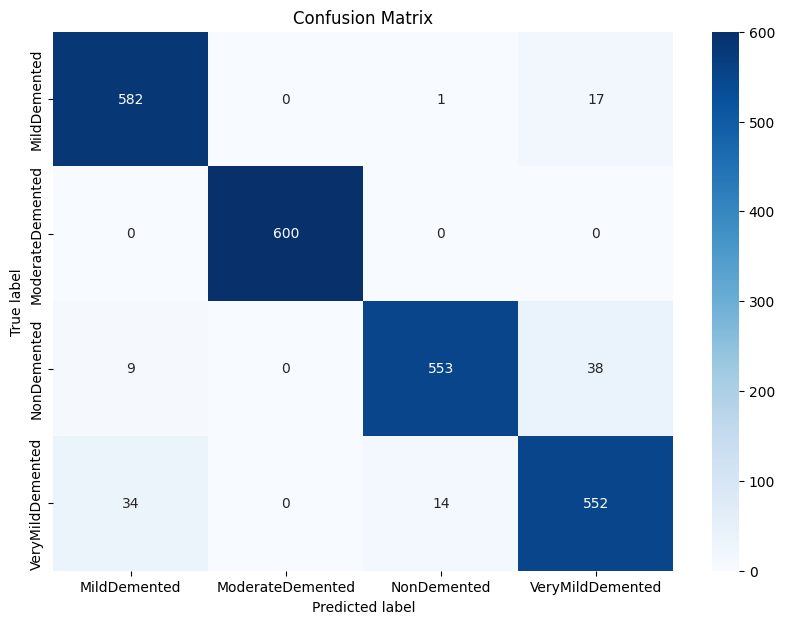

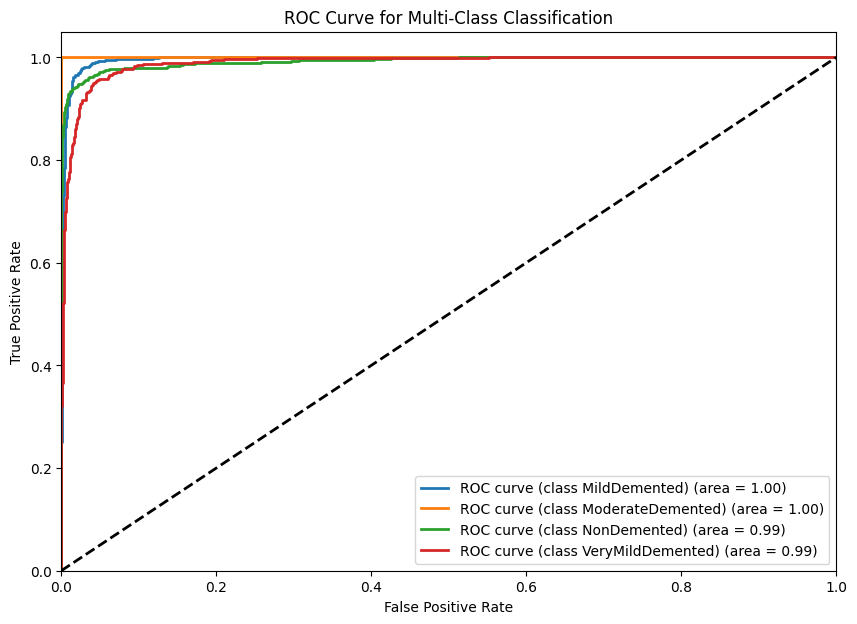

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Define your class names manually
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']  # Replace with your actual class names
n_classes = len(class_names)

# Function to extract true labels and predictions
def get_labels_and_predictions(model_1, test_dataset):
    true_labels = []
    predictions = []
    pred_probs = []
    
    for images, labels in test_dataset:
        preds = model_1.predict(images)
        pred_probs.extend(preds)  # Store probabilities for ROC
        predicted_classes = np.argmax(preds, axis=1)
        
        true_labels.extend(np.argmax(labels.numpy(), axis=1))
        predictions.extend(predicted_classes)

    return np.array(true_labels), np.array(predictions), np.array(pred_probs)

# Get true labels, predicted classes, and predicted probabilities
test_labels, predicted_classes, predicted_probs = get_labels_and_predictions(model_1, test_dataset)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Print classification report
report = classification_report(test_labels, predicted_classes, target_names=class_names)
print(report)

# Visualize confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Call the plotting function
plot_confusion_matrix(cm, class_names)

# Binarize the true labels for ROC computation
test_labels_binarized = label_binarize(test_labels, classes=[0, 1, 2, 3])  # Adjust for your number of classes

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {class_names[i]}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


In [49]:
import tensorflow as tf
import os

# Specify the path to your dataset directory
dataset_path = "D:\\prj111\\Alzheimer_s Dataset\\newtrain"  # Update this with your dataset path

# Load the dataset with TensorFlow
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(176, 206),  # Update with your image size
    batch_size=32,          # Your batch size
    label_mode='int'        # Label mode can be 'int', 'categorical', or 'binary'
)

# Initialize a dictionary to count the number of images in each class
class_counts = {}

# Loop through the dataset and count the images in each class
for images, labels in train_dataset:
    for label in labels.numpy():
        class_name = train_dataset.class_names[label]
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


Found 10623 files belonging to 4 classes.
ModerateDemented: 2410 images
NonDemented: 2912 images
MildDemented: 2543 images
VeryMildDemented: 2758 images


In [53]:
import tensorflow as tf
import os

# Specify the path to your dataset directory
dataset_path = "D:\\prj111\\Alzheimer_s Dataset\\newtest"  # Update this with your dataset path

# Load the dataset with TensorFlow
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(176, 206),  # Update with your image size
    batch_size=32,          # Your batch size
    label_mode='int'        # Label mode can be 'int', 'categorical', or 'binary'
)

# Initialize a dictionary to count the number of images in each class
class_counts = {}

# Loop through the dataset and count the images in each class
for images, labels in test_dataset:
    for label in labels.numpy():
        class_name = test_dataset.class_names[label]
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


Found 2400 files belonging to 4 classes.
NonDemented: 600 images
VeryMildDemented: 600 images
MildDemented: 600 images
ModerateDemented: 600 images
